In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import PIL
import torch

from PIL import Image
import random
import numpy as np

import torchvision.transforms as transforms

In [2]:
def display_image(image, transform=None, figsize=(4, 4)):
    if transform:
        image = transform(image)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(image)
    ax.axis('off')
    
def display_img_stats(image, transform=None):
    if transform:
        image = transform(image)
    img_npy = np.array(image)
    print(f'(min, max) = ({img_npy.min()}, {img_npy.max()})')
    print(f'(mean, std) = ({img_npy.mean():.3f}, {img_npy.std():.3f})')
    
def display_rgb_stats(image, transform=None):
    if transform:
        image = transform(image)
            
    if type(image) == PIL.JpegImagePlugin.JpegImageFile:
        rgb_img = image.split()
        
        for i in range(3):
            print('RGB'[i])
            display_img_stats(rgb_img[i])
            
    if type(image) == torch.Tensor:
        for i in range(3):
            print('RGB'[i])
            display_img_stats(image[i,:,:])

available img files ['gz2_16.jpg', 'celeba_1.jpg']


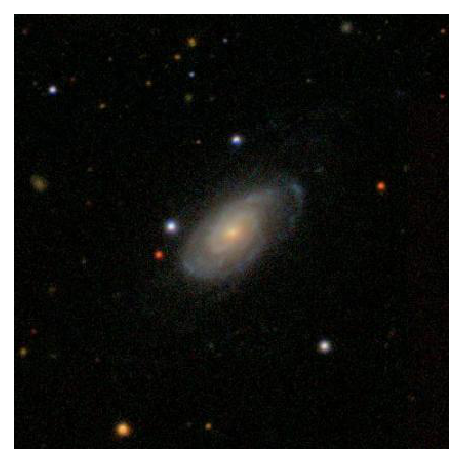

In [3]:
dir_image = './example_images'
print('available img files', os.listdir(dir_image))
filename  = 'gz2_16.jpg'
file_img  = os.path.join(dir_image, filename)

image = Image.open(file_img)
display_image(image)

## play transforms

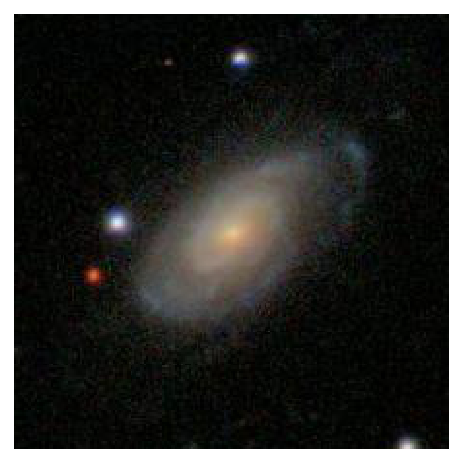

In [4]:
input_size = 224
display_image(image, transform=transforms.CenterCrop(input_size))

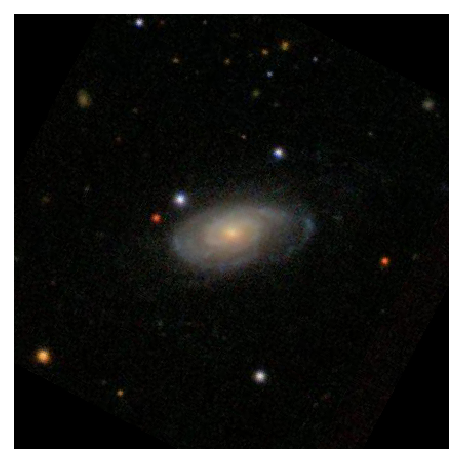

In [5]:
display_image(image, transform=transforms.RandomRotation(90))

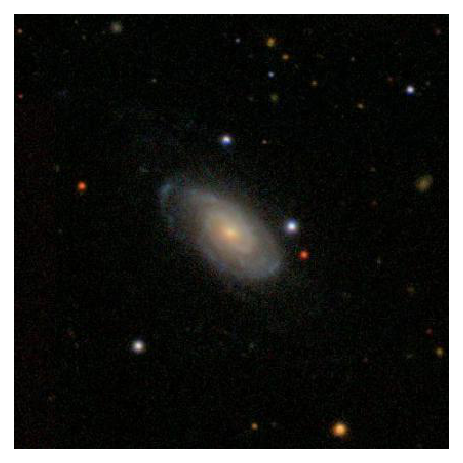

In [6]:
display_image(image, transform=transforms.RandomHorizontalFlip())

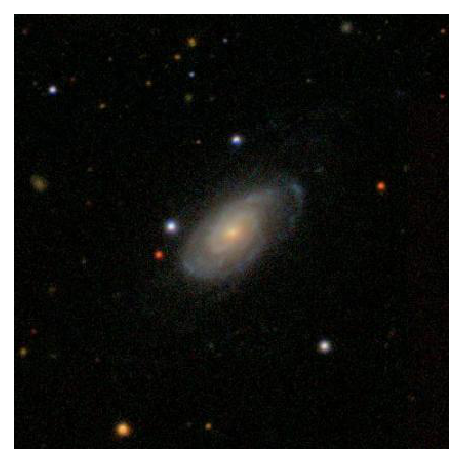

In [7]:
display_image(image, transform=transforms.RandomVerticalFlip())

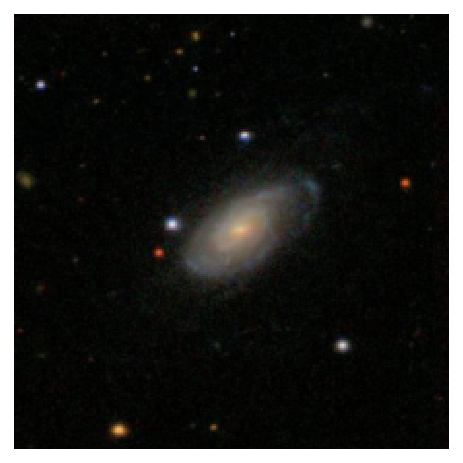

In [8]:
input_size = 224
display_image(image, transform=transforms.RandomResizedCrop(input_size, scale=(0.85,1.0), ratio=(0.8,1.2)))

In [9]:
display_rgb_stats(image)

R
(min, max) = (0, 249)
(mean, std) = (9.970, 20.691)
G
(min, max) = (0, 237)
(mean, std) = (10.310, 18.580)
B
(min, max) = (0, 253)
(mean, std) = (7.927, 17.324)


In [10]:
# transforms.ToTensor (every pixel value/255) (H, W, C) array -> (C, H, W) tensor
display_rgb_stats(image, transform=transforms.ToTensor())

R
(min, max) = (0.0, 0.9764705896377563)
(mean, std) = (0.039, 0.081)
G
(min, max) = (0.0, 0.929411768913269)
(mean, std) = (0.040, 0.073)
B
(min, max) = (0.0, 0.9921568632125854)
(mean, std) = (0.031, 0.068)


In [11]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

display_rgb_stats(image, transform=transform)

R
(min, max) = (-2.1179039478302, 2.1461596488952637)
(mean, std) = (-1.947, 0.354)
G
(min, max) = (-2.0357141494750977, 2.113445281982422)
(mean, std) = (-1.855, 0.325)
B
(min, max) = (-1.804444432258606, 2.6051416397094727)
(mean, std) = (-1.666, 0.302)
